### Yêu cầu 1

In [1]:
# Đọc dữ liệu
data <- read.csv('Dataset/marketing.csv')

In [2]:
# In thông tin chung từ dữ liệu: head(), số dòng, số cột, str(), summary()
head(data)

,youtube,facebook,newspaper,sales
,<dbl>,<dbl>,<dbl>,<dbl>
1,276.12,45.36,83.04,26.52
2,53.40,47.16,54.12,12.48
3,20.64,55.08,83.16,11.16
4,181.80,49.56,70.20,22.20
5,216.96,12.96,70.08,15.48
6,10.44,58.68,90.00,8.64


In [3]:
tail(data)

,youtube,facebook,newspaper,sales
,<dbl>,<dbl>,<dbl>,<dbl>
195,179.64,42.72,7.20,20.76
196,45.84,4.44,16.56,9.12
197,113.04,5.88,9.72,11.64
198,212.40,11.16,7.68,15.36
199,340.32,50.40,79.44,30.60
200,278.52,10.32,10.44,16.08


In [4]:
str(data)

'data.frame':	200 obs. of  4 variables:
 $ youtube  : num  276.1 53.4 20.6 181.8 217 ...
 $ facebook : num  45.4 47.2 55.1 49.6 13 ...
 $ newspaper: num  83 54.1 83.2 70.2 70.1 ...
 $ sales    : num  26.5 12.5 11.2 22.2 15.5 ...


In [5]:
summary(data)

    youtube          facebook       newspaper          sales      
 Min.   :  0.84   Min.   : 0.00   Min.   :  0.36   Min.   : 1.92  
 1st Qu.: 89.25   1st Qu.:11.97   1st Qu.: 15.30   1st Qu.:12.45  
 Median :179.70   Median :27.48   Median : 30.90   Median :15.48  
 Mean   :176.45   Mean   :27.92   Mean   : 36.66   Mean   :16.83  
 3rd Qu.:262.59   3rd Qu.:43.83   3rd Qu.: 54.12   3rd Qu.:20.88  
 Max.   :355.68   Max.   :59.52   Max.   :136.80   Max.   :32.40  

In [6]:
print(paste('cols:', ncol(data)))
print(paste('rows:', nrow(data)))

[1] "cols: 4"
[1] "rows: 200"


[1] 0.7822244

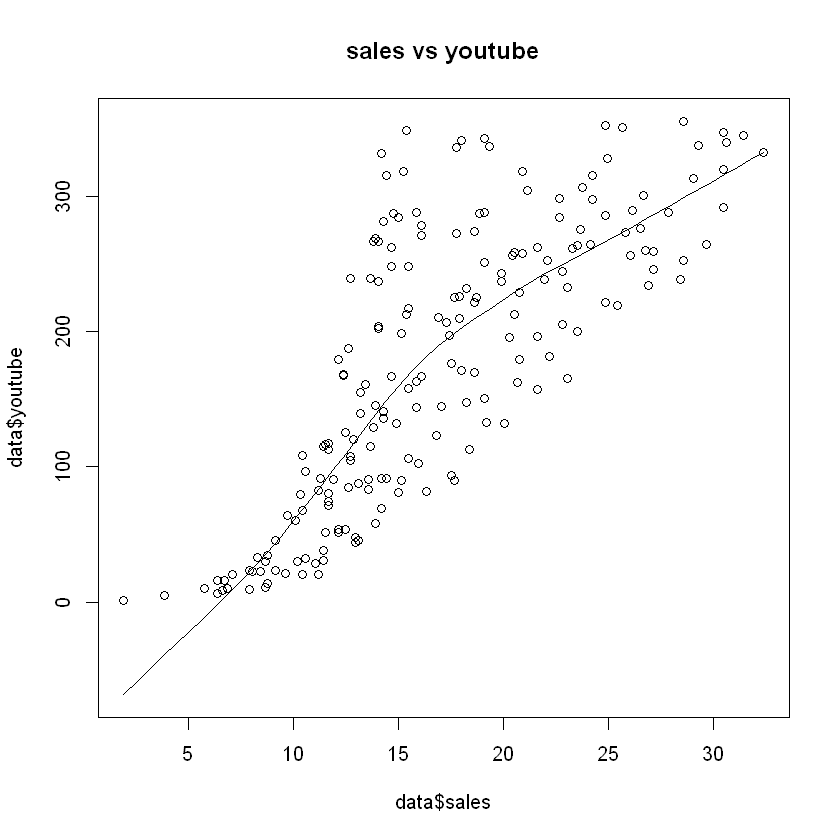

In [7]:
cor(data$sales, data$youtube)

# Vẽ biểu đồ quan sát mối liên hệ giữa sales và youtube
scatter.smooth(x=data$sales, y = data$youtube,
               main = 'sales vs youtube')

- Nhận xét: correlation khá cao ~0.78 giữa sales và youtube

In [8]:
# Kiểm tra null
(any(is.na(data)))

[1] FALSE

- Nhận xét: Không có giá trị NULL trong dataframe

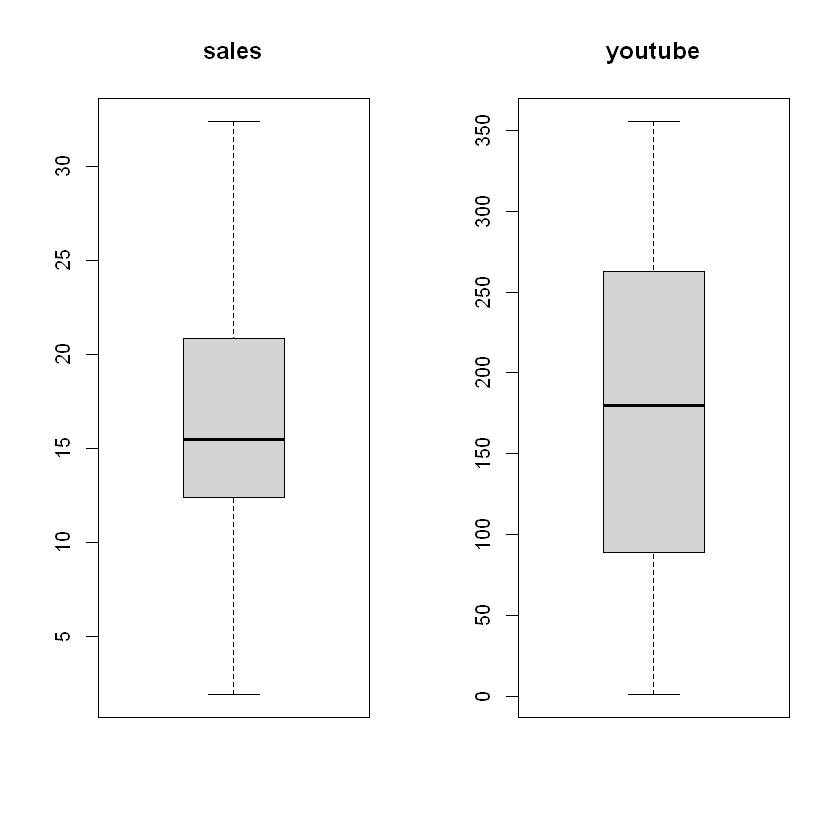

In [9]:
# Kiểm tra và xử lý outliers
par(mfrow = c(1,2)) # divide graph area in 2 columns
boxplot(data$sales, main = 'sales')
boxplot(data$youtube, main = 'youtube')

- Nhận xét: sales và youtube không có outliers

In [10]:
# Tạo train:test từ dữ liệu data với tỉ lệ 70:30
set.seed(42)
trainingRowIndex <- sample(1:nrow(data), 0.7*nrow(data))
print('Selected training row indexes:')
print(trainingRowIndex)
trainingData <- data[trainingRowIndex,] # training data
testData <- data[-trainingRowIndex, ] # test data
print('Rows of training data and testing data:')
print(nrow(trainingData))
print(nrow(testData))

[1] "Selected training row indexes:"
  [1]  49  65 153  74 146 122 200 128  47  24  71 100  89 165 110  20 154 114
 [19] 111 131  41 188  27 164 109   5 162  92 104   3  58  42 191 158  43 143
 [37] 150 170 136  36  68 196 176 173   4  99 184 183   6 134 130 116 171 118
 [55]   2 102 138  40 175  33 103 167  73  76   9  35  16 101  69 147 177  82
 [73] 168 113  18 132 186 172  55 187  21 189  57 119 140 169 126  91  13  53
 [91]  54  83  32  80  60  29  81 144  85 166 163  72 105 195  38   1 112  78
[109] 142 149  97 151 133 115  87 181  98  25  63 108  14 152 192  88  62  37
[127]  31  34  79  96 155  15 127  86 106  12  64  26 180  95
[1] "Rows of training data and testing data:"
[1] 140
[1] 60


In [11]:
# Thực hiện linear Regression với train data.
lmMod <- lm(sales ~ youtube, data = trainingData) # build the model

In [12]:
# In summary của model
summary(lmMod)


Call:
lm(formula = sales ~ youtube, data = trainingData)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5217 -2.4725 -0.1652  2.5124  8.2946 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.52760    0.66735   12.78   <2e-16 ***
youtube      0.04688    0.00315   14.88   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.814 on 138 degrees of freedom
Multiple R-squared:  0.6161,	Adjusted R-squared:  0.6134 
F-statistic: 221.5 on 1 and 138 DF,  p-value: < 2.2e-16


In [13]:
# Dự đoán y_test_predict từ test data => so sánh y_test_pred với y_test
iPred <- predict(lmMod, testData) 
head(cbind(round(as.data.frame(iPred),2), testData[4]))

,iPred,sales
,<dbl>,<dbl>
7,11.76,14.16
8,15.29,15.84
10,19.77,12.72
11,12.25,10.32
17,12.34,15.00
19,12.42,13.56


In [14]:
# Tính Mean Square Error (mse), r^2 cho train, r^2 cho test. 
mse <- mean(lmMod$residuals^2)
print(paste('mse:', mse))
mse_test <- mean((testData$sales - iPred)^2)
print(paste('mse in test:', mse_test))
print(paste('r^2 cho train:', summary(lmMod)$r.squared))
print(paste('r^2 cho test:', summary(lm(sales ~ youtube, data=testData))$r.squared))

[1] "mse: 14.3404725926901"
[1] "mse in test: 17.017194022147"
[1] "r^2 cho train: 0.616146552694467"
[1] "r^2 cho test: 0.592730879764149"


- Nhận xét: model fits 62% data

In [15]:
# Tìm Coefficients, Intercept
print(coef(lmMod))
Intercept <- coef(lmMod)['(Intercept)']

(Intercept)     youtube 
 8.52759971  0.04688147 


In [16]:
# Cho youtube lần lượt: x <- c(100, 200, 300) => dự đoán sales.
x <- c(100, 200, 300)
y <- predict(lmMod, data.frame(youtube = x))
print('results:')
print(y)

[1] "results:"
       1        2        3 
13.21575 17.90389 22.59204 


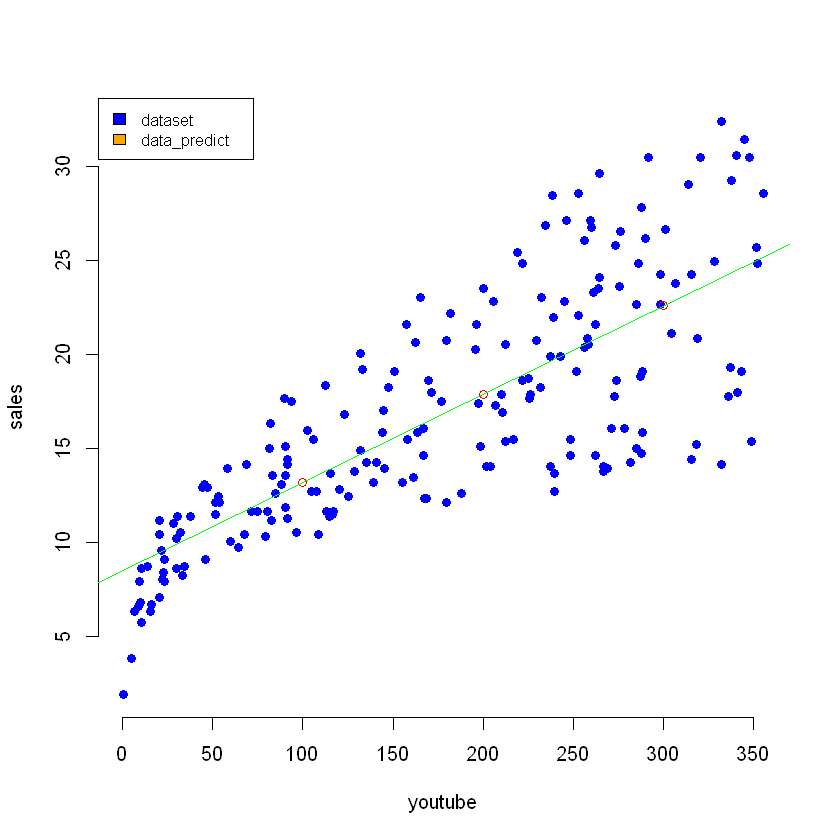

In [17]:
# Trực quan hóa kết quả.
plot(data$youtube, data$sales,
     xlab = 'youtube', ylab = 'sales',
     pch = 19, frame = FALSE, col = 'blue')
lines(x, y, col = 'red', type = 'p')
abline(lmMod, data, col = 'green')
legend('topleft', c('dataset', 'data_predict'),
       cex = 0.8, fill = c('blue','orange'))

### Yêu cầu 2

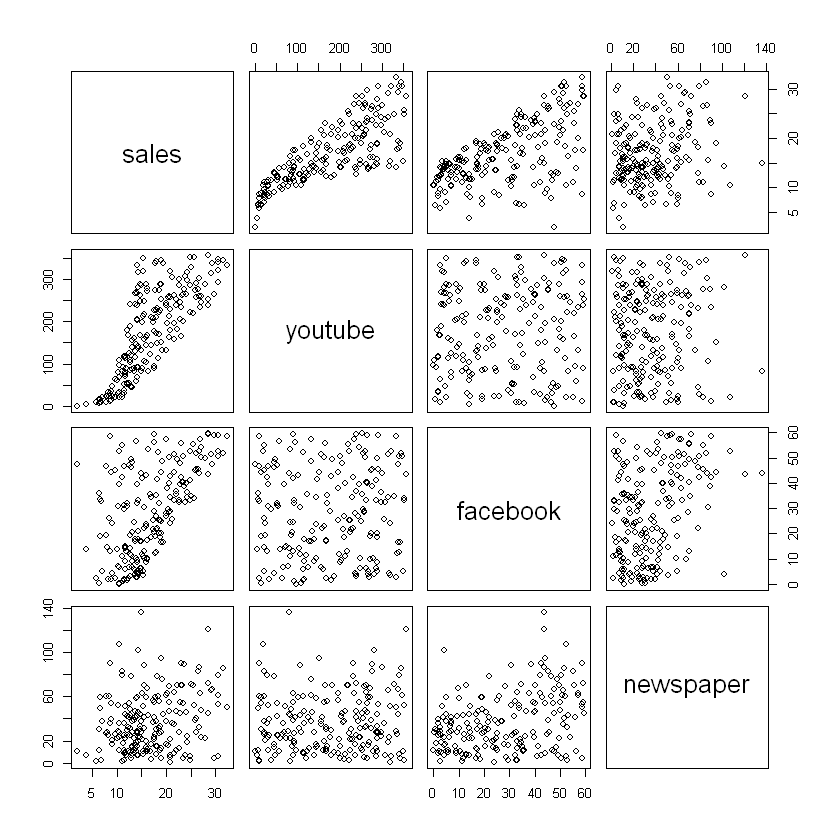

In [18]:
pairs(~sales + youtube + facebook + newspaper,
     data = data)

In [19]:
# calculate correlation between
print('Correlations sales vs yt and fb and np:')
print(cor(data$sales,
          data$youtube))
print(cor(data$sales,
          data$facebook))
print(cor(data$sales,
          data$newspaper))

[1] "Correlations sales vs yt and fb and np:"
[1] 0.7822244
[1] 0.5762226
[1] 0.228299


- Nhận xét: correlation giữa sales và youtube khá cao, nhưng correlation giữa sales với facebook và newspaper thì thấp

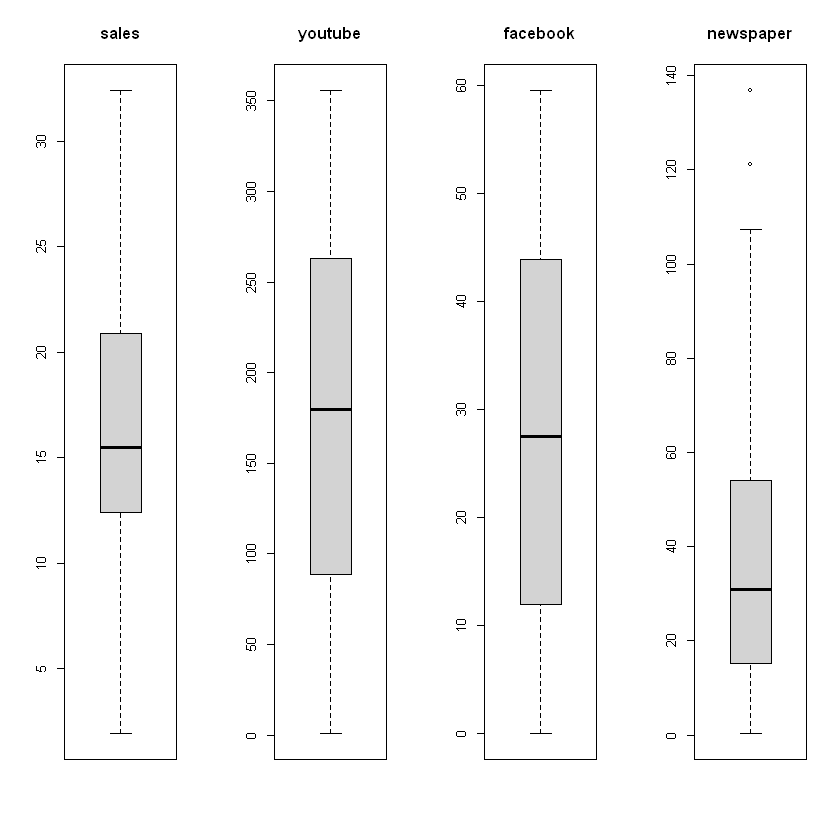

In [20]:
# Kiểm tra và xử lý outliers
par(mfrow = c(1,4)) # divide graph area in 2 columns
boxplot(data$sales, main = 'sales')
boxplot(data$youtube, main = 'youtube')
boxplot(data$facebook, main = 'facebook')
boxplot(data$newspaper, main = 'newspaper')

- Nhận xét: sales, youtube, facebook không có outliers, newspaper có outliers

In [21]:
np_outliers <- c(boxplot.stats(data$newspaper)$out)
print('np_outliers:')
print(np_outliers)

[1] "np_outliers:"
[1] 136.80 121.08


In [22]:
print(paste('Before dropping:', nrow(data)))
for (record in np_outliers) {
    data <- data[data$newspaper != record,]
    }
print(paste('After dropping:', nrow(data)))

[1] "Before dropping: 200"
[1] "After dropping: 198"


In [23]:
# Tạo train:test từ dữ liệu data với tỉ lệ 70:30
set.seed(42)
trainingRowIndex <- sample(1:nrow(data), 0.7*nrow(data))
print('Selected training row indexes:')
print(trainingRowIndex)
trainingData <- data[trainingRowIndex,] # training data
testData <- data[-trainingRowIndex, ] # test data
print('Rows of training data and testing data:')
print(nrow(trainingData))
print(nrow(testData))

[1] "Selected training row indexes:"
  [1]  49  65 153  74 146 122 198 128  47  24  71 100  89 165 110  20 154 114
 [19] 111 131  41 186  27 164 109   5 162  92 104   3  58  42 189 158  43 143
 [37] 150 168 136  36  68 194 174 171   4  99 181   6 134 130 116 169 118   2
 [55] 102 138  40 173  33 103 156  73  76   9  35  16 101  69 157  82 166 113
 [73]  18 179 184 170  55 142  21 187  57 119 139 167 126  91  13  53  54  83
 [91]  32  80  60  29  81 137  85 175 161  72 105 193  38   1 112  78 141 148
[109]  97 133 132 115  87 149  98  25  63 108  14 151 190  88  62  37  31  34
[127]  79  96 196  15 127  86 106  12  64  26 178  95
[1] "Rows of training data and testing data:"
[1] 138
[1] 60


In [24]:
# Thực hiện linear Regression với train data.
lmMod1 <- lm(sales ~., data = trainingData) # build the model

In [25]:
# In summary của model
summary(lmMod1)


Call:
lm(formula = sales ~ ., data = trainingData)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.7341 -1.0925  0.2395  1.4153  3.1875 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.971115   0.449788   8.829  5.1e-15 ***
youtube      0.043598   0.001636  26.653  < 2e-16 ***
facebook     0.191722   0.009544  20.089  < 2e-16 ***
newspaper   -0.003361   0.007215  -0.466    0.642    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.93 on 134 degrees of freedom
Multiple R-squared:  0.899,	Adjusted R-squared:  0.8967 
F-statistic: 397.4 on 3 and 134 DF,  p-value: < 2.2e-16


In [26]:
# Dự đoán y_test_predict từ test data => so sánh y_test_pred với y_test
iPred1 <- predict(lmMod1, testData) 
head(cbind(round(as.data.frame(iPred1),2), testData[4]))

,iPred1,sales
,<dbl>,<dbl>
7,14.43,14.16
8,14.72,15.84
10,14.94,12.72
11,8.67,10.32
18,27.58,29.28
20,17.10,17.52


In [27]:
# Tính Mean Square Error (mse), r^2 cho train, r^2 cho test. 
mse1 <- mean(lmMod1$residuals^2)
print(paste('mse:', mse1))
mse_test1 <- mean((testData$sales - iPred1)^2)
print(paste('mse in test:', mse_test1))
print(paste('r^2 cho train:', summary(lmMod1)$r.squared))
print(paste('r^2 cho test:', summary(lm(sales ~., data=testData))$r.squared))

[1] "mse: 3.6180636721805"
[1] "mse in test: 5.21203493060536"
[1] "r^2 cho train: 0.898969349347149"
[1] "r^2 cho test: 0.896663795760123"


- Nhận xét: model fits 89% data

In [28]:
# Tìm Coefficients, Intercept

b <- coef(lmMod1)[1]
print(b)

yt <- coef(lmMod1)[2]
fb <- coef(lmMod1)[3]
np <- coef(lmMod1)[4]

print(yt)
print(fb)
print(np)

(Intercept) 
   3.971115 
   youtube 
0.04359755 
 facebook 
0.1917224 
   newspaper 
-0.003360998 
